In [1]:

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Kích thước hình ảnh sẽ được điều chỉnh về 128x128 pixel
IMG_SIZE = 128

# Đường dẫn tới thư mục dữ liệu huấn luyện và kiểm thử
directory_data_train = "data/train"
directory_data_test = "data/test"

# Khởi tạo ImageDataGenerator cho dữ liệu huấn luyện với các kỹ thuật tăng cường dữ liệu và chuẩn hóa
train_datagen = ImageDataGenerator(rescale = 1./255, 
    rotation_range=40,           # Xoay hình ngẫu nhiên trong khoảng 40 độ
    width_shift_range=0.1,       # Dịch chuyển ngang ngẫu nhiên trong khoảng 10%
    height_shift_range=0.1,      # Dịch chuyển dọc ngẫu nhiên trong khoảng 10%
    horizontal_flip=True,        # Lật ngang ngẫu nhiên
    validation_split=0.2)        # Tách 20% dữ liệu để làm tập kiểm tra

# Khởi tạo ImageDataGenerator cho dữ liệu kiểm tra với chuẩn hóa và tách phần kiểm tra
val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)     # Tách 20% dữ liệu để làm tập kiểm tra

# Khởi tạo ImageDataGenerator cho dữ liệu kiểm thử chỉ với chuẩn hóa
test_datagen = ImageDataGenerator(rescale = 1./255)

# Tạo tập dữ liệu huấn luyện từ thư mục, với kích thước ảnh là 128x128 và batch size là 32
train_ds = train_datagen.flow_from_directory(
    directory = directory_data_train,
    batch_size = 32,
    target_size = (IMG_SIZE, IMG_SIZE),   # Điều chỉnh hình ảnh về kích thước 128x128 pixel
    class_mode='categorical',             # Phân loại nhiều lớp (categorical)
    subset="training",                    # Chọn phần dữ liệu để huấn luyện
    seed=123  
)

# Tạo tập dữ liệu kiểm tra từ thư mục, với kích thước ảnh là 128x128 và batch size là 32
validation_ds = val_datagen.flow_from_directory(
    directory= directory_data_train,
    batch_size=32,
    target_size=(IMG_SIZE, IMG_SIZE),     # Điều chỉnh hình ảnh về kích thước 128x128 pixel
    class_mode='categorical',             # Phân loại nhiều lớp (categorical)
    subset="validation",                  # Chọn phần dữ liệu để kiểm tra
    seed=123 
)

# Tạo tập dữ liệu kiểm thử từ thư mục, với kích thước ảnh là 128x128 và batch size là 32
test_ds = test_datagen.flow_from_directory(
    directory = directory_data_test,
    batch_size = 32,
    target_size = (IMG_SIZE, IMG_SIZE),   # Điều chỉnh hình ảnh về kích thước 128x128 pixel
    class_mode='categorical'              # Phân loại nhiều lớp (categorical)
)


Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [1]:
test_ds.num_classes

NameError: name 'test_ds' is not defined

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Tải mô hình MobileNetV2 đã được huấn luyện trước mà không bao gồm lớp phân loại đầu ra
MobileNetV2_base = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling='avg')  # 'pooling='avg' sẽ tự động thêm lớp GlobalAveragePooling2D

# Đóng băng các lớp của mô hình đã được huấn luyện trước
MobileNetV2_base.trainable = False

# Xây dựng mô hình sử dụng Functional API
x = MobileNetV2_base.output

x = BatchNormalization()(x)
x = Dropout(0.3)(x)  # Giảm Dropout để giữ lại nhiều đặc trưng hơn
x = Dense(128, activation='relu')(x)

# Lớp đầu ra
predictions = Dense(train_ds.num_classes, activation='softmax')(x)

# Định nghĩa mô hình
model = tf.keras.Model(inputs=MobileNetV2_base.input, outputs=predictions)

# Biên dịch mô hình
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:

history= model.fit(train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds),
    epochs=20, 
)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.4888 - loss: 1.7214 - val_accuracy: 0.8696 - val_loss: 0.4401
Epoch 2/20


2024-08-12 20:58:30.102318: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8696 - val_loss: 0.4401
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8576 - loss: 0.4660 - val_accuracy: 0.9000 - val_loss: 0.3295
Epoch 4/20


2024-08-12 20:58:39.066505: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9000 - val_loss: 0.3295
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.8765 - loss: 0.3562 - val_accuracy: 0.9152 - val_loss: 0.3018
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9152 - val_loss: 0.3018
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.9043 - loss: 0.2772 - val_accuracy: 0.9065 - val_loss: 0.3191
Epoch 8/20


2024-08-12 20:58:56.315766: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9065 - val_loss: 0.3191
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8977 - loss: 0.2546 - val_accuracy: 0.9087 - val_loss: 0.2939
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9087 - val_loss: 0.2939
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9302 - loss: 0.2075 - val_accuracy: 0.9152 - val_loss: 0.2961
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9152 - val_loss: 0.2961
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9280 - loss: 0.2092 - val_accuracy: 0.9196 - val_loss: 0.2916
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9196 - val_loss: 0.2916
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9441 - loss: 0.

2024-08-12 20:59:33.327982: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9152 - val_loss: 0.2997
Epoch 17/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.9352 - loss: 0.1794 - val_accuracy: 0.9000 - val_loss: 0.3290
Epoch 18/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9000 - val_loss: 0.3290
Epoch 19/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.9353 - loss: 0.1648 - val_accuracy: 0.9174 - val_loss: 0.2959
Epoch 20/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9174 - val_loss: 0.2959


In [5]:
# model.summary()


In [6]:
import pickle
# Lưu lịch sử huấn luyện
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [7]:
# Lưu mô hình
model.save("model.h5")
print(tf.__version__)

2.17.0


In [8]:
# Tải mô hình
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [9]:
# model.summary()
# Đánh giá mô hình
loss, accuracy = model.evaluate(validation_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9165 - loss: 0.2903
Loss: 0.2959293723106384, Accuracy: 0.917391300201416


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8581 - loss: 0.5424
Test Accuracy: 0.8576
Test Loss: 0.5534
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step
Classification Report
              precision    recall  f1-score   support

       apple       0.16      0.16      0.16        89
     avocado       0.07      0.08      0.07       105
      banana       0.11      0.11      0.11       106
      cherry       0.13      0.13      0.13       105
        kiwi       0.07      0.07      0.07       105
       mango       0.07      0.06      0.06       105
      orange       0.15      0.19      0.16        97
  pinenapple       0.13      0.13      0.13       105
 stawberries       0.10      0.11      0.11       103
  watermelon       0.14      0.11      0.13       105

    accuracy                           0.11      1025
   macro avg       0.11      0.11      0.11      1025
weighted avg       0.11      0.11      0.11      1025



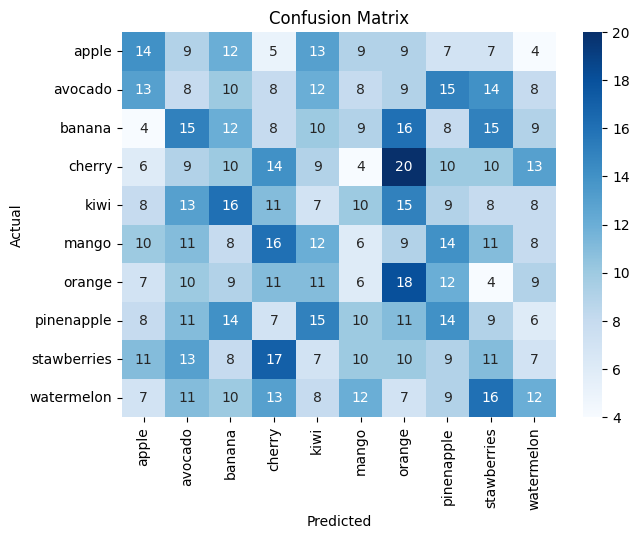

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Đánh giá mô hình trên tập kiểm thử
test_loss, test_accuracy = model.evaluate(test_ds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Dự đoán trên tập kiểm thử
y_pred = model.predict(test_ds)
y_pred_classes = y_pred.argmax(axis=-1)

# Lấy nhãn thực tế từ tập kiểm thử
y_true = test_ds.classes

# Báo cáo phân loại
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=test_ds.class_indices.keys()))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_ds.class_indices.keys(), yticklabels=test_ds.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


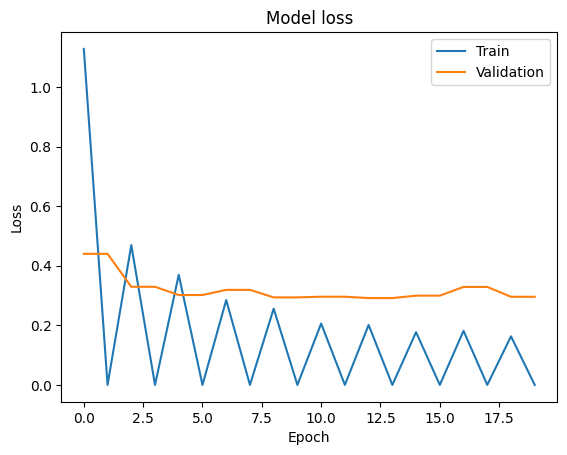

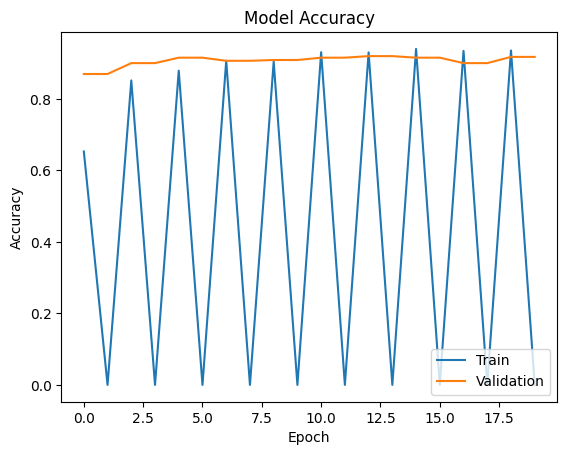

In [11]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [12]:
import numpy as np


def showTestImages(ds, ):
    # Get the class labels
    class_labels = list(ds.class_indices.keys())

    # Predict on each image and plot results
    num_images = 20
    num_images_per_row = 5  # Set the number of images per row
    num_rows = 4

    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        image, label = next(ds)
        predictions = model.predict(image)
        
        # Iterate over each image in the batch
        for j in range(len(image)):
            if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
                predicted_class = class_labels[np.argmax(predictions[j])]
                true_class = class_labels[np.argmax(label[j])]
                
                plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
                plt.imshow(image[j])
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


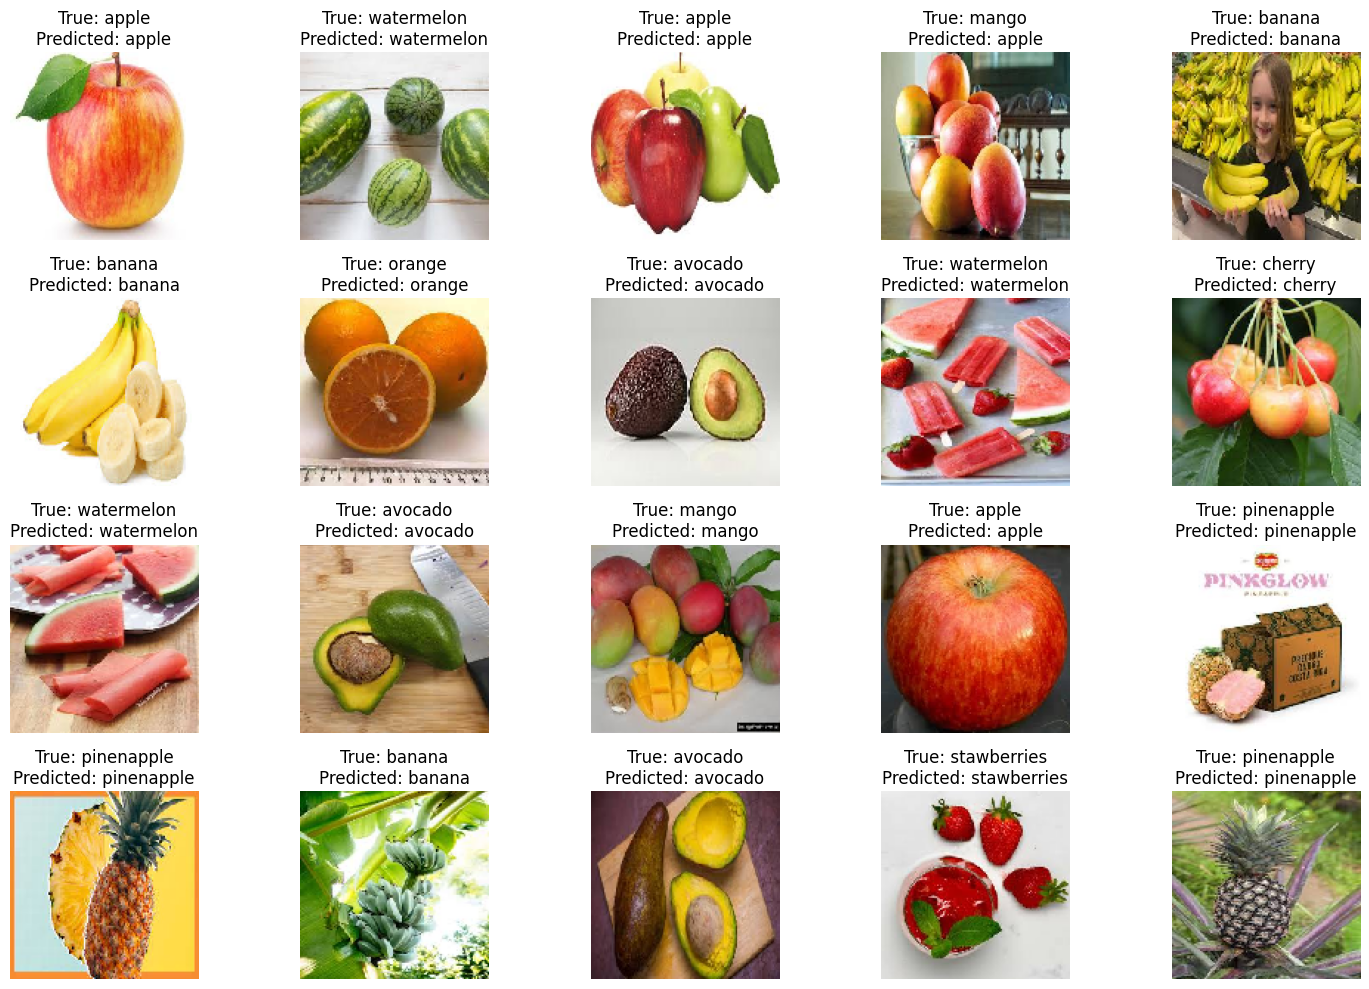

In [13]:
showTestImages(test_ds)

# Actual data

Found 1025 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


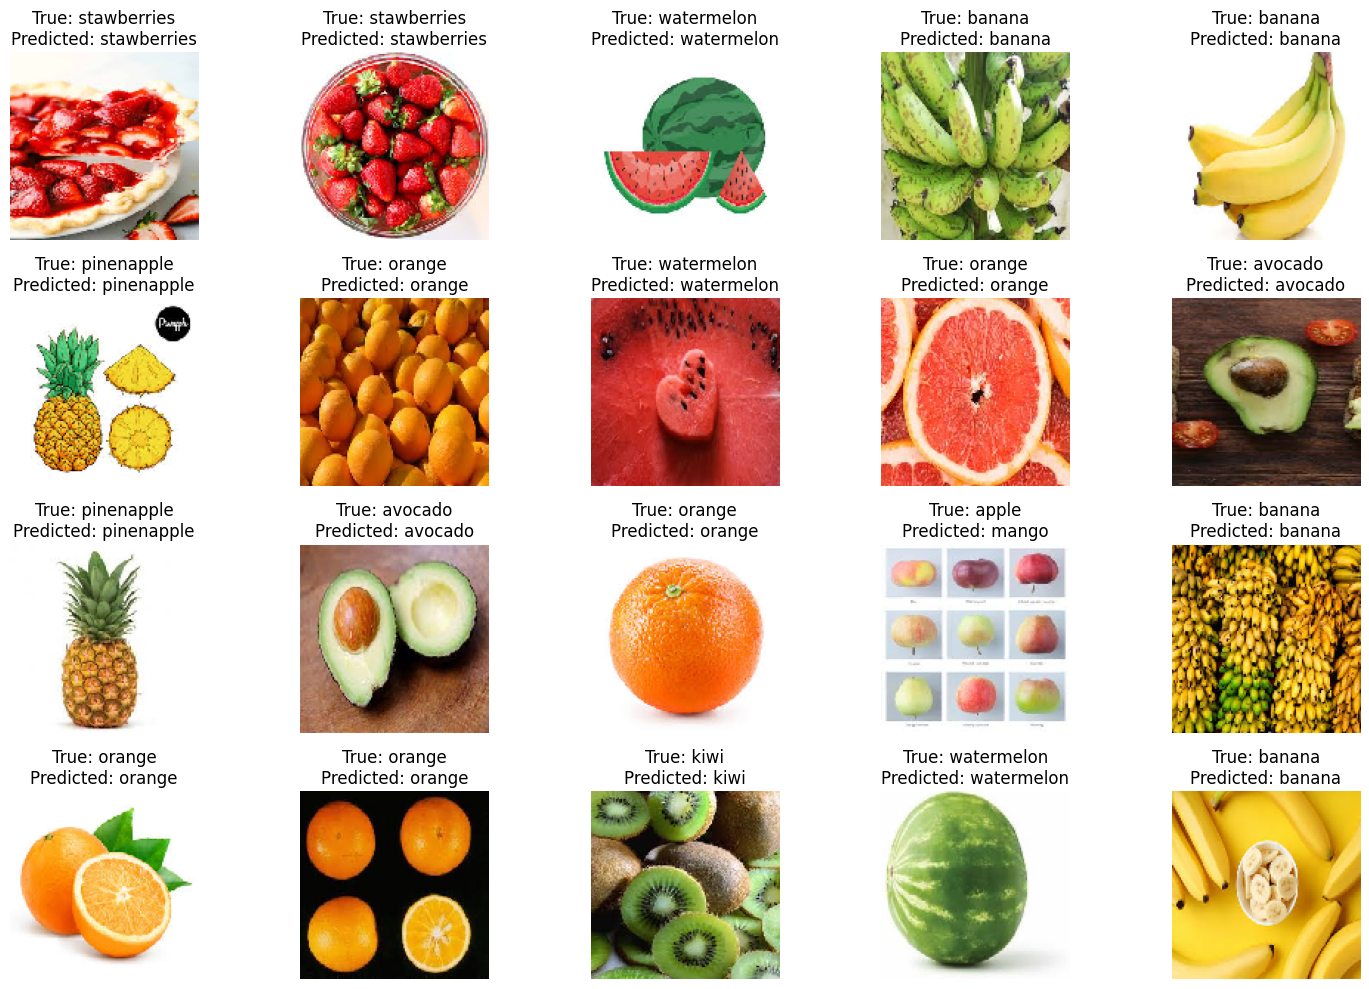

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
directory_data_actual = "data/predict"
# Khởi tạo ImageDataGenerator cho dữ liệu kiểm thử chỉ với chuẩn hóa
actual_datagen = ImageDataGenerator(rescale = 1./255)

# Tạo tập dữ liệu kiểm thử từ thư mục, với kích thước ảnh là 128x128 và batch size là 32
actual_ds = actual_datagen.flow_from_directory(
    directory = directory_data_test,
    batch_size = 32,
    target_size = (IMG_SIZE, IMG_SIZE),   # Điều chỉnh hình ảnh về kích thước 128x128 pixel
    class_mode='categorical'              # Phân loại nhiều lớp (categorical)
)
showTestImages(actual_ds)